In [3]:
cd /home/liya

/home/liya


Creating window glfw
(480, 640, 3)


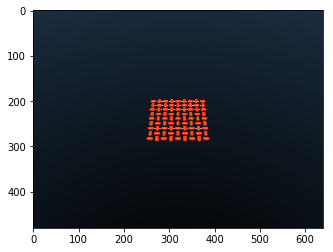

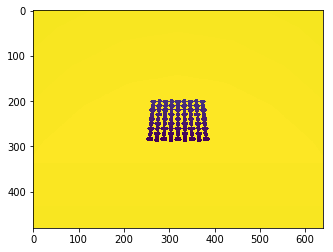

In [4]:
%matplotlib inline
from mujoco_py.mjviewer import MjViewer
from numpy.testing import assert_array_equal,assert_almost_equal
from mujoco_py import MjSim, load_model_from_xml, load_model_from_path, MjSimState, ignore_mujoco_warnings, load_model_from_mjb
import mujoco_py
import numpy as np
import cv2
from skimage.io import imsave, imshow
import matplotlib.pyplot as plt

def getCamParams():
    angle=np.deg2rad(45.0)
    f = 0.008  #m
    fx=640/np.tan(angle)
    fy=480/np.tan(angle)   
    return fx,fy

def imgFloat_To_Uint8(img):
    pix_max=img.max()
    pix_min=img.min()
    scale=255.0/(pix_max-pix_min)
    img=(img-pix_min)*scale
    img=np.array(img,dtype=np.uint8)
    return pix_min,scale,img

xml_path = "/mnt/liya2/mujoco200_linux/model/cloth.xml"
model = load_model_from_path(xml_path)
sim = MjSim(model)
viewer = MjViewer(sim)
sim.forward()

# while True:
# sim.step()
# image = viewer.render()
# print(np.size(image))
# cv2.imshow("depth image", image)
# cv2.imsave('/mnt/liya2/depth_image.png', image)

for i in range(1):
    sim.step()
    frame_size = (640, 480)
    camera_name = None
    curr_frame, depth_img = sim.render(width=frame_size[0], height=frame_size[1], depth=True, mode='offscreen', camera_name=camera_name, device_id=0)
    
#     depth = (depth_img - np.min(depth_img))/ (np.max(depth_img) - np.min(depth_img))
#     depth = np.array(depth * 255, dtype=np.uint8)
        
#     print('depth = ', depth)
#     print(np.shape(depth))
    
    plt.figure("cloth")
    plt.imshow(np.flipud(curr_frame))
    
    plt.figure('depth')
    plt.imshow(np.flipud(depth_img))
    print(np.shape(curr_frame))
    plt.show()

# curr_frame = sim.render(width=frame_size[0], height=frame_size[1],mode='window', camera_name=camera_name, device_id=0)